# Lab 2 Video   



In [966]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as spd
import pickle
from sklearn.metrics import confusion_matrix
from numpy.linalg import pinv


In [967]:
fName = 'LAB2distancias001.p'
D = pickle.load(open(fName,'rb'))

In [968]:
type(D)

dict

In [969]:
D.keys()

dict_keys(['X', 'idxClass'])

In [970]:
X = D['X']
y = D['idxClass']
print(X.shape)
print(y.shape)

(2, 2000)
(2000,)


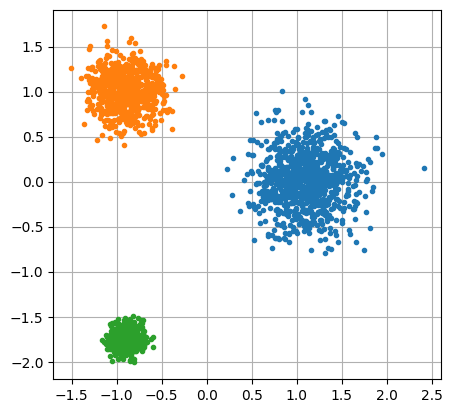

In [971]:
plt.plot(X[0,y==1],X[1,y==1],'.')
plt.plot(X[0,y==2],X[1,y==2],'.')
plt.plot(X[0,y==3],X[1,y==3],'.')
plt.axis('scaled')
plt.grid(True)

In [972]:
np.unique(y)

array([1., 2., 3.])

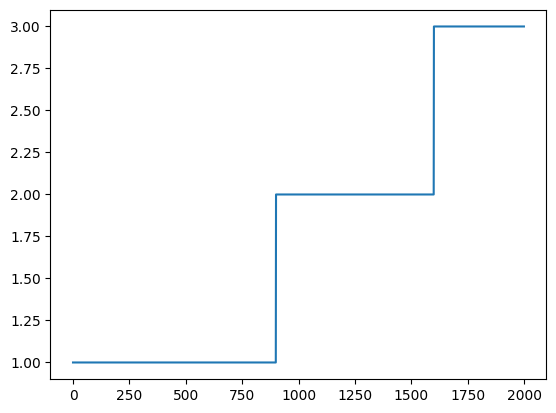

In [973]:
plt.plot(y) # pontos estão ordenados

In [974]:
help(spd.pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *, out=None, **kwargs)
    Pairwise distances between observations in n-dimensional space.

    See Notes for common calling conventions.

    Parameters
    ----------
    X : array_like
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'jensenshannon', 'kulczynski1',
        'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath',
        'sqeuclidean', 'yule'.
    out : ndarray, optional
        The output array.
        If not None, condensed distance matrix Y is stored in this array.
    **kwargs : dict, optional
        Extra arguments to `metric`:

In [975]:
D2 = spd.squareform(spd.pdist(X.T,'euclidean'))
print(D2.shape)

(2000, 2000)


In [976]:
D1 = spd.squareform(spd.pdist(X.T,'cityblock'))
print(D1.shape)

(2000, 2000)


In [977]:
Dc = spd.squareform(spd.pdist(X.T,'cosine'))
print(Dc.shape)

(2000, 2000)


(np.float64(-0.5), np.float64(1999.5), np.float64(1999.5), np.float64(-0.5))

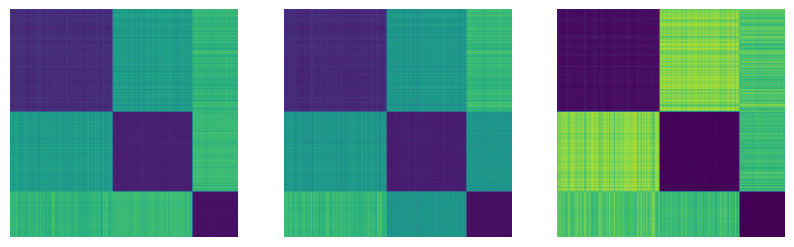

In [978]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(D2)
plt.axis('off')
plt.subplot(132)
plt.imshow(D1)
plt.axis('off')
plt.subplot(133)
plt.imshow(Dc)
plt.axis('off')

In [979]:
nx = np.sqrt(np.sum(X**2,axis=0))
print(nx.shape)

(2000,)


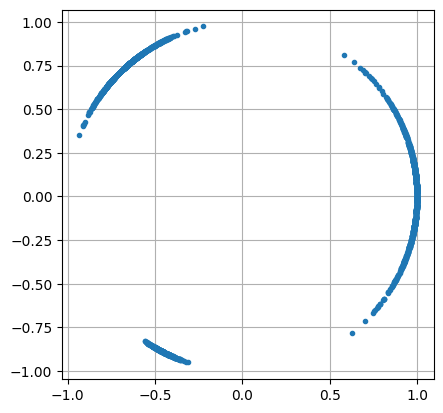

In [980]:
Xn = X/nx
plt.plot(Xn[0,:],Xn[1,:],'.')
plt.axis('scaled')
plt.grid(True)

In [981]:
Dc2 = 1-np.dot(Xn.T,Xn)
print(Dc2.shape)

(2000, 2000)


(np.float64(-0.5), np.float64(1999.5), np.float64(1999.5), np.float64(-0.5))

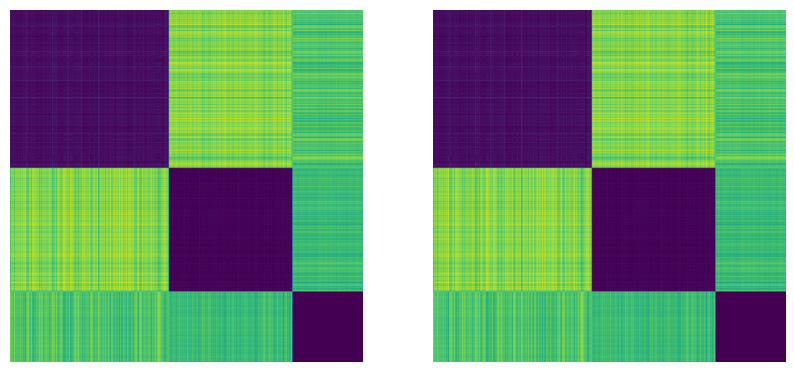

In [982]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(Dc)
plt.axis('off')
plt.subplot(122)
plt.imshow(Dc2)
plt.axis('off')

In [983]:
print('1-->\n',Dc[:3,:3])
print('2-->\n',Dc[:3,:3])

1-->
 [[0.         0.02685195 0.05020918]
 [0.02685195 0.         0.00369288]
 [0.05020918 0.00369288 0.        ]]
2-->
 [[0.         0.02685195 0.05020918]
 [0.02685195 0.         0.00369288]
 [0.05020918 0.00369288 0.        ]]


In [984]:
fName = 'MNISTsmall.p'
D = pickle.load(open(fName,'rb'))

In [985]:
X = D['X']
X = X*1.0
y = D['trueClass']
print(X.shape)
print(X.dtype)

(784, 15000)
float64


In [986]:
np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

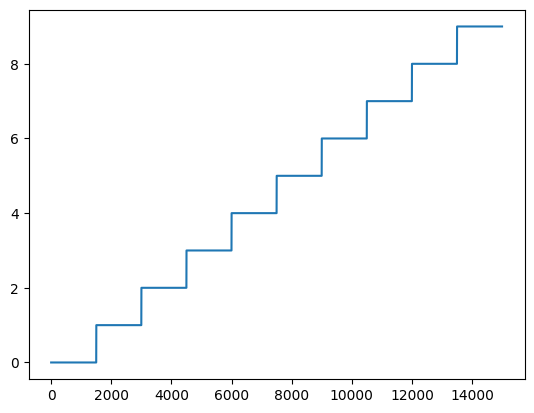

In [987]:
plt.plot(y)

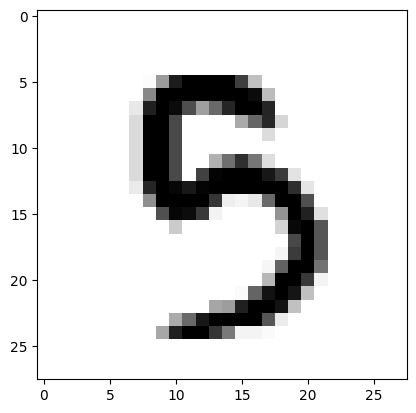

In [988]:
x = X[:,7777]
plt.imshow(x.reshape((28,28)),cmap='binary')

In [989]:
Xb = X[:,y==0][:,:200]
for i in range(1,10):
    Xtmp = X[:,y==i][:,:200]
    Xb = np.hstack((Xb,Xtmp))
print(Xb.shape)

(784, 2000)


In [990]:
D2 = spd.squareform(spd.pdist(Xb.T,'euclidean'))
D1 = spd.squareform(spd.pdist(Xb.T,'cityblock'))
Dc = spd.squareform(spd.pdist(Xb.T,'cosine'))

(np.float64(-0.5), np.float64(1999.5), np.float64(1999.5), np.float64(-0.5))

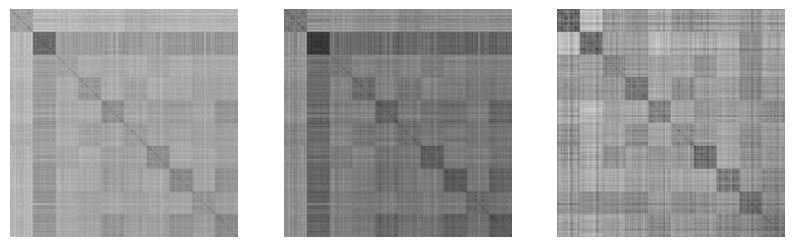

In [991]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(D2,cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(D1,cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(Dc,cmap='gray')
plt.axis('off')

In [992]:
fName = 'LAB2distancias002.p'
D = pickle.load(open(fName,'rb'))

In [993]:
X = D['X']
y = D['idxClass']

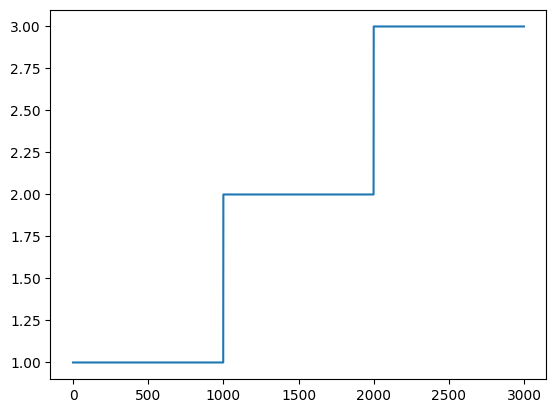

In [994]:
plt.plot(y)

(np.float64(-6.162766768248915),
 np.float64(5.460849510937149),
 np.float64(-3.7936429671957037),
 np.float64(4.073949557949851))

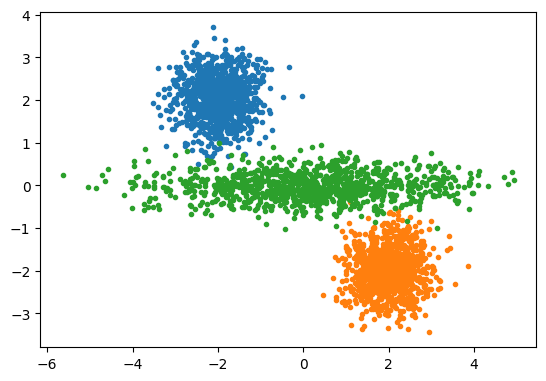

In [995]:
plt.plot(X[0,y==1],X[1,y==1],'.')
plt.plot(X[0,y==2],X[1,y==2],'.')
plt.plot(X[0,y==3],X[1,y==3],'.')
plt.axis('scaled')

In [996]:
m1 = np.mean(X[:,y==1],axis=1)
m2 = np.mean(X[:,y==2],axis=1)
m3 = np.mean(X[:,y==3],axis=1)

In [997]:
D1 = np.sqrt(np.sum((X-m1[:,np.newaxis])**2,axis=0))
D2 = np.sqrt(np.sum((X-m2[:,np.newaxis])**2,axis=0))
D3 = np.sqrt(np.sum((X-m3[:,np.newaxis])**2,axis=0))

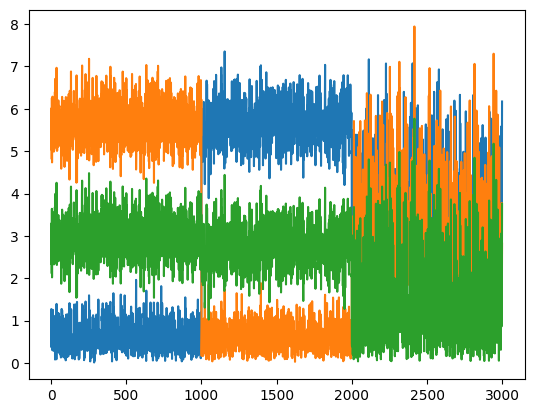

In [998]:
plt.plot(D1)
plt.plot(D2)
plt.plot(D3)

In [999]:
D = np.vstack((D1,D2,D3))
ye = np.argmin(D,axis=0)+1

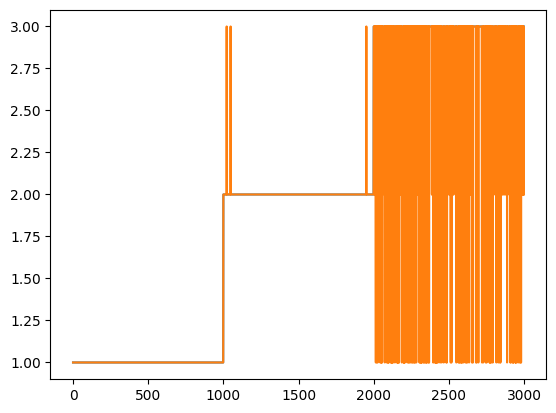

In [1000]:
plt.plot(y)
plt.plot(ye)

In [1001]:
from sklearn.metrics import confusion_matrix
MC = confusion_matrix(y,ye)
print(MC)

[[1000    0    0]
 [   0  997    3]
 [ 122  135  743]]


(np.float64(-6.162766768248915),
 np.float64(5.460849510937149),
 np.float64(-3.7936429671957037),
 np.float64(4.073949557949851))

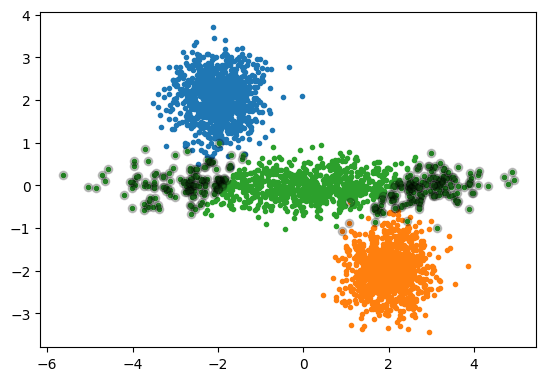

In [1002]:
plt.plot(X[0,y==1],X[1,y==1],'.')
plt.plot(X[0,y==2],X[1,y==2],'.')
plt.plot(X[0,y==3],X[1,y==3],'.')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.2)
plt.axis('scaled')

In [1003]:
m1 = np.array([-2,2])
m2 = np.array([2,-2])
m3 = np.array([0,0])
S1 = np.eye(2)*1/4
S2 = np.array([[1/4,0],[0,1/4]])
S3 = np.array([[3,0],[0,1/10]])



In [1004]:
from numpy.linalg import pinv

S1i = pinv(S1)
S2i = pinv(S2)
S3i = pinv(S3)

In [1005]:
D1 = np.sqrt(np.sum((X-m1[:,np.newaxis])*np.dot(S1i,(X-m1[:,np.newaxis])),axis=0))
D2 = np.sqrt(np.sum((X-m2[:,np.newaxis])*np.dot(S2i,(X-m2[:,np.newaxis])),axis=0))
D3 = np.sqrt(np.sum((X-m3[:,np.newaxis])*np.dot(S3i,(X-m3[:,np.newaxis])),axis=0))
D = np.vstack((D1,D2,D3))
ye = np.argmin(D,axis=0)+1
MC = confusion_matrix(y,ye)
print(MC)
print(np.sum(y!=ye))

[[992   0   8]
 [  0 991   9]
 [  2   3 995]]
22


(np.float64(-6.162766768248915),
 np.float64(5.460849510937149),
 np.float64(-3.7936429671957037),
 np.float64(4.073949557949851))

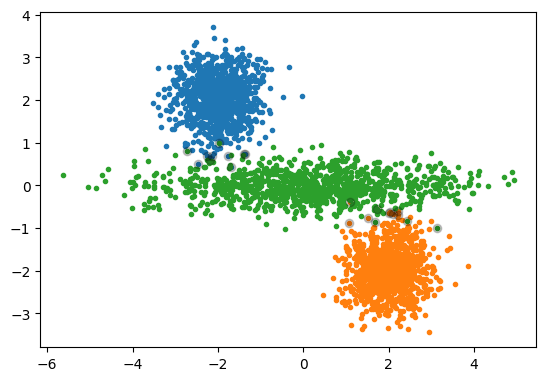

In [1006]:
plt.plot(X[0,y==1],X[1,y==1],'.')
plt.plot(X[0,y==2],X[1,y==2],'.')
plt.plot(X[0,y==3],X[1,y==3],'.')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.2)
plt.axis('scaled')

In [1007]:
from sklearn import datasets as DT

D = DT.load_iris()
X = D.data.T
y = D.target

In [1008]:
m0 = np.mean(X[:,y==0],axis=1)
m1 = np.mean(X[:,y==1],axis=1)
m2 = np.mean(X[:,y==2],axis=1)

D0 = np.sqrt(np.sum((X-m0[:,np.newaxis])**2,axis=0))
D1 = np.sqrt(np.sum((X-m1[:,np.newaxis])**2,axis=0))
D2 = np.sqrt(np.sum((X-m2[:,np.newaxis])**2,axis=0))
D = np.vstack((D0,D1,D2))
ye = np.argmin(D,axis=0)

[[50  0  0]
 [ 0 46  4]
 [ 0  7 43]]
11


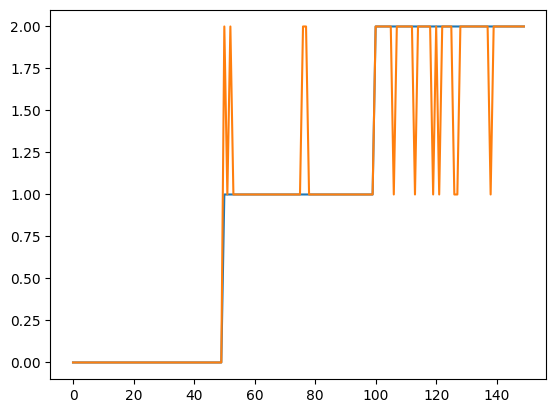

In [1009]:
MC = confusion_matrix(y,ye)
print(MC)
print(np.sum(y!=ye))
plt.plot(y)
plt.plot(ye)

In [1010]:
fName = 'MNISTsmall.p'
D = pickle.load(open(fName,'rb'))

In [1011]:
D.keys()

dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])

In [1012]:
X = D['X']
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']


In [1013]:
X1 = X[:,f1]
y1 = y[f1]
X2 = X[:,f2]
y2 = y[f2]

In [1014]:
m0 = np.mean(X1[:,y1==0],axis=1)
m1 = np.mean(X1[:,y1==1],axis=1)
m2 = np.mean(X1[:,y1==2],axis=1)
m3 = np.mean(X1[:,y1==3],axis=1)
m4 = np.mean(X1[:,y1==4],axis=1)
m5 = np.mean(X1[:,y1==5],axis=1)
m6 = np.mean(X1[:,y1==6],axis=1)
m7 = np.mean(X1[:,y1==7],axis=1)
m8 = np.mean(X1[:,y1==8],axis=1)
m9 = np.mean(X1[:,y1==9],axis=1)

In [1015]:
D0 = np.sqrt(np.sum((X1-m0[:,np.newaxis])**2,axis=0))
D1 = np.sqrt(np.sum((X1-m1[:,np.newaxis])**2,axis=0))
D2 = np.sqrt(np.sum((X1-m2[:,np.newaxis])**2,axis=0))
D3 = np.sqrt(np.sum((X1-m3[:,np.newaxis])**2,axis=0))
D4 = np.sqrt(np.sum((X1-m4[:,np.newaxis])**2,axis=0))
D5 = np.sqrt(np.sum((X1-m5[:,np.newaxis])**2,axis=0))
D6 = np.sqrt(np.sum((X1-m6[:,np.newaxis])**2,axis=0))
D7 = np.sqrt(np.sum((X1-m7[:,np.newaxis])**2,axis=0))
D8 = np.sqrt(np.sum((X1-m8[:,np.newaxis])**2,axis=0))
D9 = np.sqrt(np.sum((X1-m9[:,np.newaxis])**2,axis=0))
D = np.vstack((D0,D1,D2,D3,D4,D5,D6,D7,D8,D9))
y1e = np.argmin(D,axis=0)

In [1016]:
MC = confusion_matrix(y1,y1e)
print(MC)
print(np.sum(y1!=y1e))

[[873   0   8   9   2  62  25   6  14   1]
 [  0 976   3   0   0  14   0   2   3   2]
 [ 14  80 763  28  28  10  25  13  32   7]
 [  6  39  27 762   2  69  10  20  39  26]
 [  1  24   7   0 813   5  16   5   8 121]
 [ 27  65   6 163  24 646  22   5  16  26]
 [ 16  50  22   0  20  23 866   0   3   0]
 [  8  55   6   0  27   3   1 836   7  57]
 [  8  67  16  87  13  47  12   4 710  36]
 [ 17  21   9  14  74   8   3  46  15 793]]
1962


In [1017]:
D0 = np.sqrt(np.sum((X2-m0[:,np.newaxis])**2,axis=0))
D1 = np.sqrt(np.sum((X2-m1[:,np.newaxis])**2,axis=0))
D2 = np.sqrt(np.sum((X2-m2[:,np.newaxis])**2,axis=0))
D3 = np.sqrt(np.sum((X2-m3[:,np.newaxis])**2,axis=0))
D4 = np.sqrt(np.sum((X2-m4[:,np.newaxis])**2,axis=0))
D5 = np.sqrt(np.sum((X2-m5[:,np.newaxis])**2,axis=0))
D6 = np.sqrt(np.sum((X2-m6[:,np.newaxis])**2,axis=0))
D7 = np.sqrt(np.sum((X2-m7[:,np.newaxis])**2,axis=0))
D8 = np.sqrt(np.sum((X2-m8[:,np.newaxis])**2,axis=0))
D9 = np.sqrt(np.sum((X2-m9[:,np.newaxis])**2,axis=0))
D = np.vstack((D0,D1,D2,D3,D4,D5,D6,D7,D8,D9))
y2e = np.argmin(D,axis=0)
MC = confusion_matrix(y2,y2e)
print(MC)
print(np.sum(y2!=y2e))

[[421   0   5   0   0  50  16   0   7   1]
 [  0 477   1   4   0  13   3   0   2   0]
 [  8  70 331  32   9   2   7  15  24   2]
 [  2  16   3 393   1  46   4  12  16   7]
 [  0  10   2   0 389   4  13   1   4  77]
 [  8  16   2  89  17 322  10   9  11  16]
 [ 10  22  21   0  36  33 377   0   1   0]
 [  1  51   9   1  15   2   0 387   4  30]
 [  5  25   4  66   8  30   7   7 322  26]
 [  4  12   8   9  63  10   1  10   3 380]]
1201


In [1018]:
m0 = np.mean(X1[:,y1==0],axis=1)
m1 = np.mean(X1[:,y1==1],axis=1)
m2 = np.mean(X1[:,y1==2],axis=1)
m3 = np.mean(X1[:,y1==3],axis=1)
m4 = np.mean(X1[:,y1==4],axis=1)
m5 = np.mean(X1[:,y1==5],axis=1)
m6 = np.mean(X1[:,y1==6],axis=1)
m7 = np.mean(X1[:,y1==7],axis=1)
m8 = np.mean(X1[:,y1==8],axis=1)
m9 = np.mean(X1[:,y1==9],axis=1)

In [1019]:
S0 = np.cov(X1[:,y1==0])
S1 = np.cov(X1[:,y1==1])
S2 = np.cov(X1[:,y1==2])
S3 = np.cov(X1[:,y1==3])
S4 = np.cov(X1[:,y1==4])
S5 = np.cov(X1[:,y1==5])
S6 = np.cov(X1[:,y1==6])
S7 = np.cov(X1[:,y1==7])
S8 = np.cov(X1[:,y1==8])
S9 = np.cov(X1[:,y1==9])


In [1020]:
from scipy.linalg import inv, pinv

In [1021]:
S0i = pinv(S0)
S1i = pinv(S1)
S2i = pinv(S2)
S3i = pinv(S3)
S4i = pinv(S4)
S5i = pinv(S5)
S6i = pinv(S6)
S7i = pinv(S7)
S8i = pinv(S8)
S9i = pinv(S9)

In [1022]:
Xtmp = X1-m0[:,np.newaxis]
D0 = np.sqrt(np.sum((Xtmp*np.dot(S0i,Xtmp)),axis=0))
Xtmp=X1-m1[:,np.newaxis]
D1=np.sqrt(np.sum(Xtmp*np.dot(S1i,Xtmp),axis=0))
Xtmp=X1-m2[:,np.newaxis]
D2=np.sqrt(np.sum(Xtmp*np.dot(S2i,Xtmp),axis=0))
Xtmp=X1-m3[:,np.newaxis]
D3=np.sqrt(np.sum(Xtmp*np.dot(S3i,Xtmp),axis=0))
Xtmp=X1-m4[:,np.newaxis]
D4=np.sqrt(np.sum(Xtmp*np.dot(S4i,Xtmp),axis=0))
Xtmp=X1-m5[:,np.newaxis]
D5=np.sqrt(np.sum(Xtmp*np.dot(S5i,Xtmp),axis=0))
Xtmp=X1-m6[:,np.newaxis]
D6=np.sqrt(np.sum(Xtmp*np.dot(S6i,Xtmp),axis=0))
Xtmp=X1-m7[:,np.newaxis]
D7=np.sqrt(np.sum(Xtmp*np.dot(S7i,Xtmp),axis=0))
Xtmp=X1-m8[:,np.newaxis]
D8=np.sqrt(np.sum(Xtmp*np.dot(S8i,Xtmp),axis=0))
Xtmp=X1-m9[:,np.newaxis]
D9=np.sqrt(np.sum(Xtmp*np.dot(S9i,Xtmp),axis=0))


In [1023]:
D = np.vstack((D0,D1,D2,D3,D4,D5,D6,D7,D8,D9))
y1e = np.argmin(D,axis=0)
MC = confusion_matrix(y1,y1e)
print(MC)
print(np.sum(y1!=y1e))

[[999   0   1   0   0   0   0   0   0   0]
 [  0 850  23   1   9   0   0   1 114   2]
 [  0   0 998   0   0   0   0   0   2   0]
 [  0   0   2 994   0   0   0   0   3   1]
 [  0   0   0   0 997   0   0   0   1   2]
 [  1   0   0   0   0 996   0   0   3   0]
 [  0   0   0   1   0   4 989   0   6   0]
 [  0   0   1   2   1   0   0 990   6   0]
 [  0   0   1   0   0   0   0   0 999   0]
 [  0   0   0   2   3   0   0   2  10 983]]
205


In [1024]:
Xtmp=X2-m0[:,np.newaxis]
D0=np.sqrt(np.sum(Xtmp*np.dot(S0i,Xtmp),axis=0))
Xtmp=X2-m1[:,np.newaxis]
D1=np.sqrt(np.sum(Xtmp*np.dot(S1i,Xtmp),axis=0))
Xtmp=X2-m2[:,np.newaxis]
D2=np.sqrt(np.sum(Xtmp*np.dot(S2i,Xtmp),axis=0))
Xtmp=X2-m3[:,np.newaxis]
D3=np.sqrt(np.sum(Xtmp*np.dot(S3i,Xtmp),axis=0))
Xtmp=X2-m4[:,np.newaxis]
D4=np.sqrt(np.sum(Xtmp*np.dot(S4i,Xtmp),axis=0))
Xtmp=X2-m5[:,np.newaxis]
D5=np.sqrt(np.sum(Xtmp*np.dot(S5i,Xtmp),axis=0))
Xtmp=X2-m6[:,np.newaxis]
D6=np.sqrt(np.sum(Xtmp*np.dot(S6i,Xtmp),axis=0))
Xtmp=X2-m7[:,np.newaxis]
D7=np.sqrt(np.sum(Xtmp*np.dot(S7i,Xtmp),axis=0))
Xtmp=X2-m8[:,np.newaxis]
D8=np.sqrt(np.sum(Xtmp*np.dot(S8i,Xtmp),axis=0))
Xtmp=X2-m9[:,np.newaxis]
D9=np.sqrt(np.sum(Xtmp*np.dot(S9i,Xtmp),axis=0))

In [1025]:
D = np.vstack((D0,D1,D2,D3,D4,D5,D6,D7,D8,D9))
y2e = np.argmin(D,axis=0)
MC = confusion_matrix(y2,y2e)
print(MC)
print(np.sum(y2!=y2e))

[[457   0  25   4   2   0   2   0  10   0]
 [  0 385  26   2   7   0   3   0  77   0]
 [ 11   0 463   6   3   0   1   2  14   0]
 [  3   0  46 415   3   1   0   3  27   2]
 [  5   0  38   9 420   0   1   3  16   8]
 [ 17   0  22  98  13 264   1   1  83   1]
 [ 22   0  42   8  17  15 376   0  20   0]
 [  3   0  42  17  39   0   0 360  20  19]
 [ 10   0  39  53   8   4   1   4 380   1]
 [  3   0  14  11  70   0   0   9  31 362]]
1118


In [1026]:
from sklearn.neighbors import KNeighborsClassifier
fName = 'LAB2distancias002.p'
D = pickle.load(open(fName,'rb'))
X = D['X']
y = D['idxClass']

In [1027]:
X1a=X[:,:100]
X1b=X[:,500:1000]
X2a=X[:,1000:1100]
X2b=X[:,1500:2000]
X3a=X[:,2000:2100]
X3b=X[:,2500:3000]

In [1028]:
X1 = np.hstack((X1a,X2a,X3a)).T
X2 = np.hstack((X1b,X2b,X3b)).T
y1 = np.hstack((np.zeros(100),np.ones(100),np.ones(100)*2))
y2 = np.hstack((np.zeros(500),np.ones(500),np.ones(500)*2))


In [1036]:
knn=KNeighborsClassifier(n_neighbors=1).fit(X1,y1)
y2e=knn.predict(X2)
print(np.sum(y2e!=y2))
print(confusion_matrix(y2,y2e))

21
[[498   0   2]
 [  0 497   3]
 [  5  11 484]]


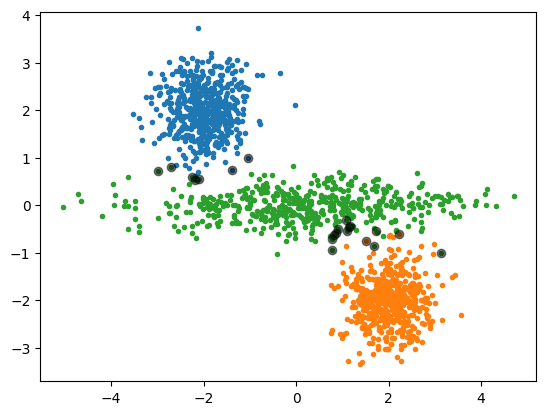

In [1037]:
plt.plot(X1b[0,:],X1b[1,:],'.')
plt.plot(X2b[0,:],X2b[1,:],'.')
plt.plot(X3b[0,:],X3b[1,:],'.')
plt.plot(X2[y2!=y2e,0],X2[y2!=y2e,1],'ok',alpha=0.5)

In [1038]:
knn=KNeighborsClassifier(n_neighbors=5).fit(X1,y1)
y2e=knn.predict(X2)
print(np.sum(y2e!=y2))
print(confusion_matrix(y2,y2e))

13
[[499   0   1]
 [  0 495   5]
 [  4   3 493]]


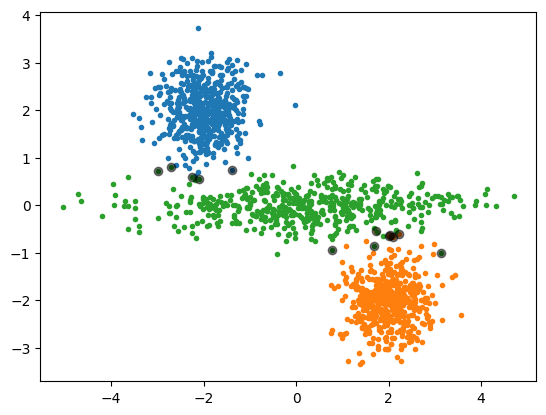

In [1039]:
plt.plot(X1b[0,:],X1b[1,:],'.')
plt.plot(X2b[0,:],X2b[1,:],'.')
plt.plot(X3b[0,:],X3b[1,:],'.')
plt.plot(X2[y2!=y2e,0],X2[y2!=y2e,1],'ok',alpha=0.5)

In [1040]:
fName='MNISTsmall.p'
D=pickle.load(open(fName,'rb'))


In [1041]:
X=D['X']
y=D['trueClass']
f1=D['foldTrain']
f2=D['foldTest']
X1=X[:,f1].T
X2=X[:,f2].T
y1=y[f1]
y2=y[f2]

In [1045]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X1,y1)
y2e = knn.predict(X2)
print(np.sum(y2e!=y2))
print(confusion_matrix(y2,y2e))

357
[[496   0   1   0   0   1   2   0   0   0]
 [  0 495   1   2   0   0   2   0   0   0]
 [  7  11 452   7   1   0   3  18   1   0]
 [  0   1   1 461   1  13   2   9   7   5]
 [  0   5   0   0 460   0   3   2   1  29]
 [  3   3   0  13   2 466   3   2   3   5]
 [  8   3   0   0   3   4 481   0   1   0]
 [  0  22   3   2   4   1   0 456   0  12]
 [  5   3   6  27   4  16   6   7 421   5]
 [  3   6   1   6  12   3   1  11   2 455]]


In [1046]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X1,y1)
y2e = knn.predict(X2)
print(np.sum(y2e!=y2))
print(confusion_matrix(y2,y2e))

389
[[494   0   0   0   0   1   5   0   0   0]
 [  0 495   2   2   0   0   1   0   0   0]
 [  9  16 439   6   0   0   6  21   3   0]
 [  1   3   3 465   1   7   2   8   7   3]
 [  0   4   1   0 462   0   5   1   0  27]
 [  3   4   0  12   6 461   5   1   3   5]
 [  9   5   0   0   4   1 481   0   0   0]
 [  0  31   1   1   5   1   0 445   0  16]
 [  8   4   7  22   4  16   5   7 418   9]
 [  4   7   2   8  11   2   1  12   2 451]]
